<a href="https://colab.research.google.com/github/DarshanSuresh/FoodHub-Project/blob/main/foodhub_darsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis:


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Enable graphical display
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here

print('the data frame has',df.shape[0],'rows and',df.shape[1],'columns')

the data frame has 1898 rows and 9 columns


#### Observations: We have 1898 rows and 9 columns in the data. The rows account for all the orders processed


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: We have 1 float data type, 4 integers and 4 objects. The Rating column has the wrong data type.  Order ID, and Customer ID  are also categorical variables with numerical labels. We may want to amend them accordingly¶


In [ ]:
# Checking the entries in the Rating Column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

### to enable change of data type, we can reassign the 'Not given' rating the number zero number. This will enable us to convert the rating column to a numeric data type without compromising the observations

In [ ]:
# Replace the not given value to 0
df['rating'] = df['rating'].replace(['Not given'],0)

# ..Then Change the data types accordingly

df = df.astype({"rating": float, "order_id": object, "customer_id": object})

#...Then confirm the data type has changed accordingly

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: We do not have any null values in the data frame, hence it requires no treatment, however we note that we did not have reviews for all the orders, for which we replaced the 'Not given' with 0


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


### Observations:
We have 1898 observations, 25% of the observations cost 12.08 or below, have no rating (rating zero as per the amendment done above), take about 23 minutes or below to prepare, and 20 minutes or below to deliver, 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time respectively, for the 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the same parameters.

Of these it takes a minimum of <b>20 minutes</b>, an average of <b>27.37 minutes</b> and a maximum of <b>35 minutes</b> to prepare the food once the order is placed


### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
# Check the rating value, noting that we assigned the rating 'Not given' a value of zero
df['rating'].value_counts(dropna=False)

rating
0.0    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

#### Observations: Having converted the rating 'Not Given' value to zero, the count of zeros represent the same hence 736 orders were not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

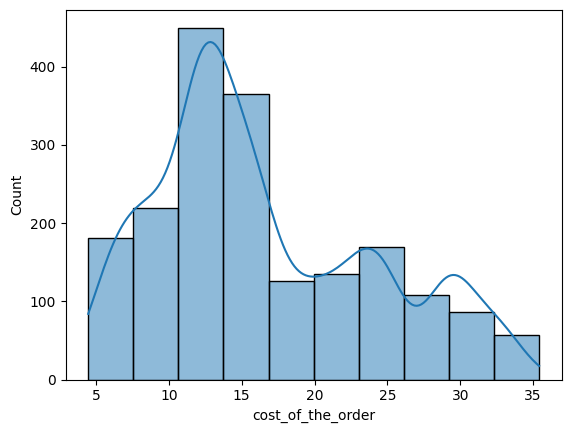

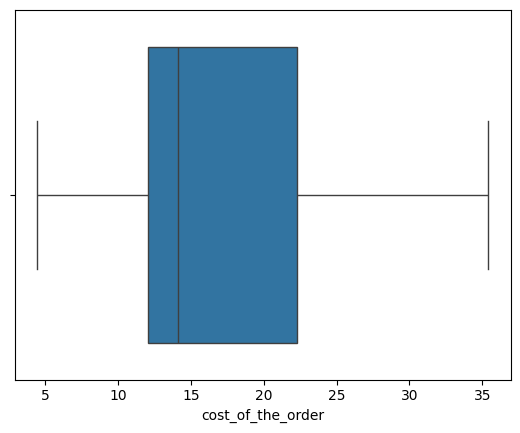

In [ ]:
# Write the code here
sns.histplot(data = df, x='cost_of_the_order',bins = 10, stat = 'count',kde=True)
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();

### Observation on Cost of Orders
The histplot is skewed to the left, that is,more  towards lower costs, however we note that there is a slight peak at around 25 dollars. The boxplot indicates that the median  cost is about 14 dollars, with the orders being right skewed. This implies a  a bigger spread above the median.
Given that we have two main target markets students and working professionals, it would be good to note if they are the cause of the two peaks with the probability of the well-off professionals being on the right peak and students concentrating on the main and left peak.


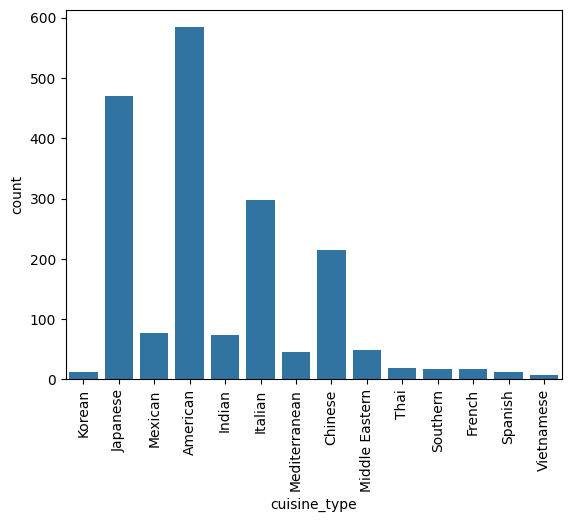

In [ ]:
# Order count per Cuisine
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()


### Observations on Cuisine Type:
The most popular cuisines are American, Japanese,Italian,Chinese in that order, followed with a close tie between Mexican and Indian.

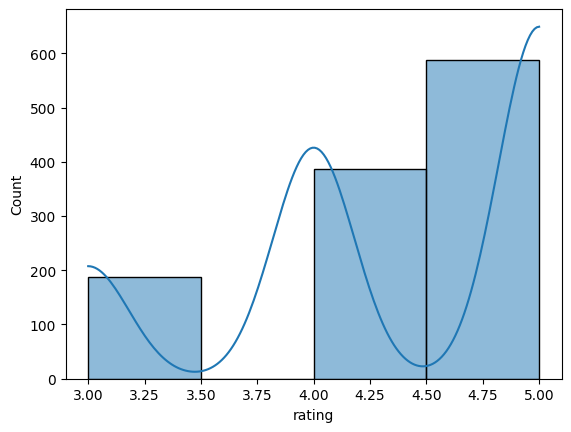

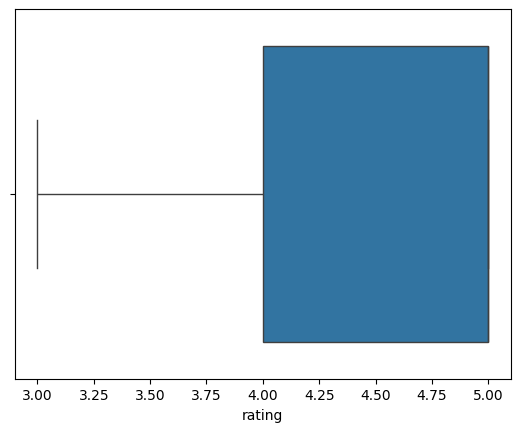

In [ ]:
# For rating we eliminate unrated rows to prevent bias
df5 = df[df['rating']!= 0]

sns.histplot(data = df5, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df5, x='rating')
plt.show();

### Observations on Rating:
For the rated orders,considering that there are about 38.77% unrated orders, the histplot shows that the ratings are concentrated around the maximum rating,  but the boxplot is heavily skewed to the left such that we do not have the right whisker.


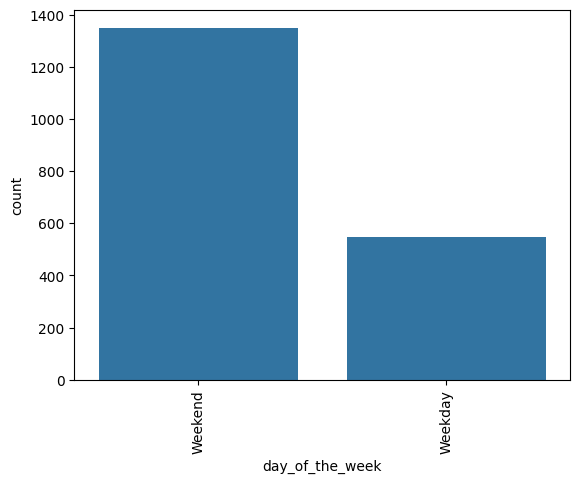

In [ ]:
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()


### Observations on Day of Week:
There is higher activity over the weekend than during the other weekdays.

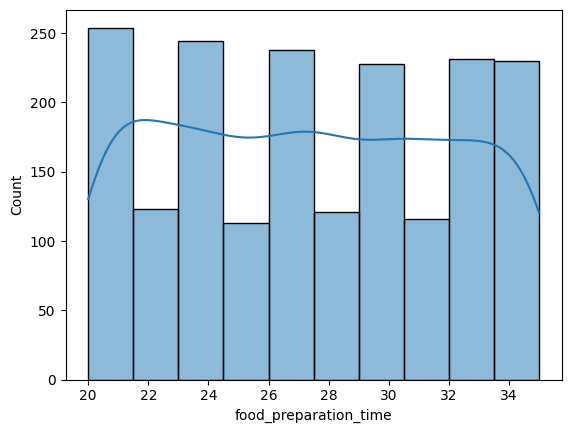

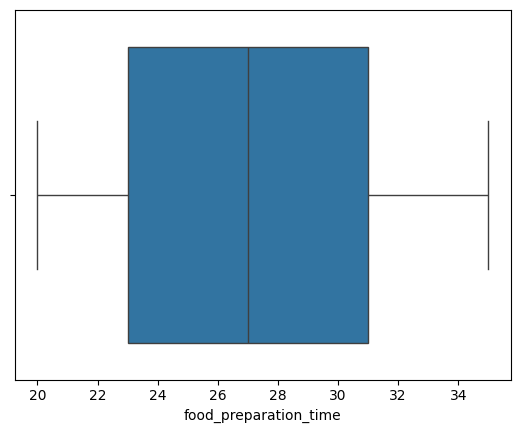

In [ ]:
# Write the code here

sns.histplot(data = df, x='food_preparation_time',bins = 10, stat = 'count',kde = True)
plt.show()
sns.boxplot(data = df, x='food_preparation_time')
plt.show();

### Observation on Food preparation time:

There is a fairly even distribution of the time it takes to prepare the dish between 20 minutes and 36 minutes with a median of about 27 minutes

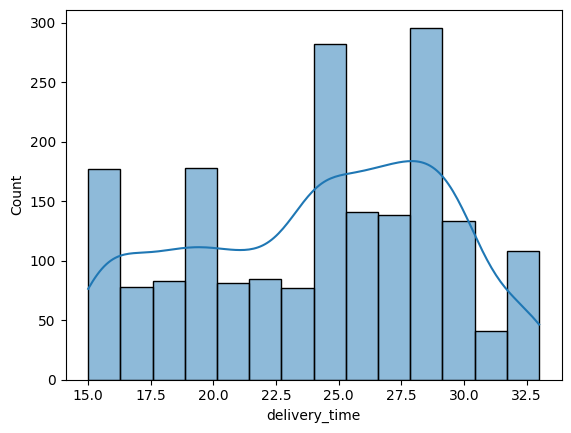

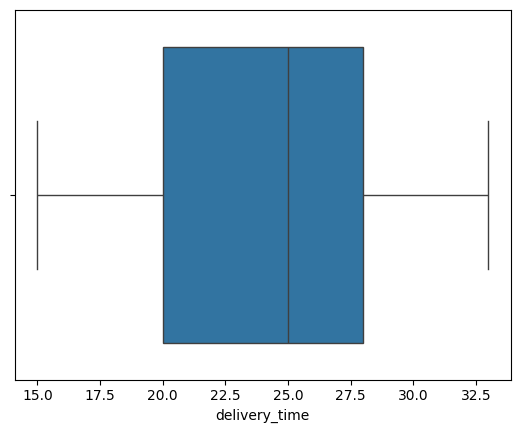

In [ ]:
# Write the code here
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();

### Observations on Delivery Time:
The median delivery time is about 25 minutes with the observations being skewed to the left. From the histplot we can determine that most orders take between  25 and 28 minutes to be delivered.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
# The code first groups the DataFrame by Restaurant Names, then counts the order per each Restaurant, then orders the output
# in descending order before limiting the outcome to the top five Restaurants. The value 5 is optional in this case since by
# default .head() returns five observations

df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
<b>Shake Shack</b> is the leading restaurant with <b>219</b> orders, <b>The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken & Parm</b> have <b>132, 119, 96 & 68 </b>orders respectively and together make up the top 5 restaurants in terms of orders processed

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
# The code first filters observations for the Weekend only, then  grouping the output by Cuisine Type. We count the order IDs
# for each Cuisine, then we order the observations so that the Cuisine with most orders is at the top. Optionally we limit the
#output to 5
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
<b>American Cuisine Type</b> is the most popular during the weekends with a count of <b>415 orders</b>


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
# Do a count of total orders
total_observations = df['cost_of_the_order'].count()
# Do a count of orders with cost above $20
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
# Compute the percent of the orders above $20
percentage_above20 = round((orders_above20/total_observations)*100,2) # Rounded to two decimal places
percentage_above20

29.24

#### Observations: 29.24% of Total orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
# We could easily pick the information from the df.describe() statistical summary but we can arrive at the same as below

avr_del_time = round(df[['delivery_time']].agg('mean'),2) # Rounded to two decimal places
print(avr_del_time)

delivery_time    24.16
dtype: float64


#### Observations: On average it takes 24.16 minutes to have the prepared orders delivered


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Write the code here
# The code limits the columns to the ones of interest, then we group the output by Customer ID and count the orders per
# Customer, We then order the output starting with the customers with the highest orders. Optionally we have increased the
# extract to first 10 rows to help have a better view of the rows of interest
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:
Having extracted the top 10 most frequent customers, it reveals that there is a tie of four clients with the 5th highest order count. The company may have to use the total amount spent by these customers ,or some other parameter, to be a tie-breaker or make a decision on how to address the multiple customers with the same qualifying score.Otherwise they should provision to reward 8 customers instead of 5.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


### Observations on the Heatmap and pairplot:
The heatmap shows very weak correlation between the variables.

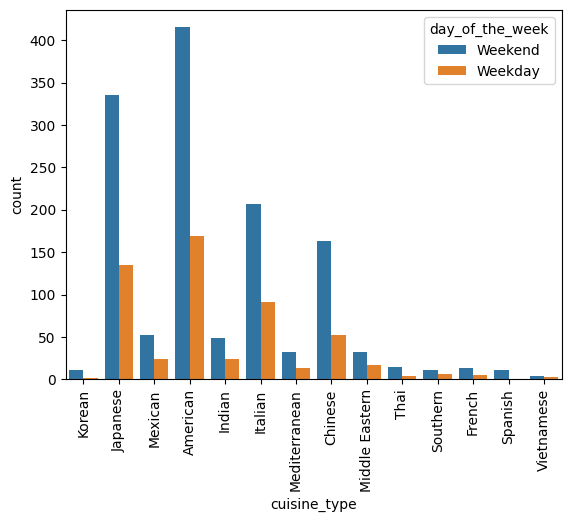

In [ ]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

### Observations on Orders per cuisine per day of the week:
We note that the pattern of popularity of cuisine folllow the same pattern irrespective of the day of the week. However the demand is generally low during the weekdays

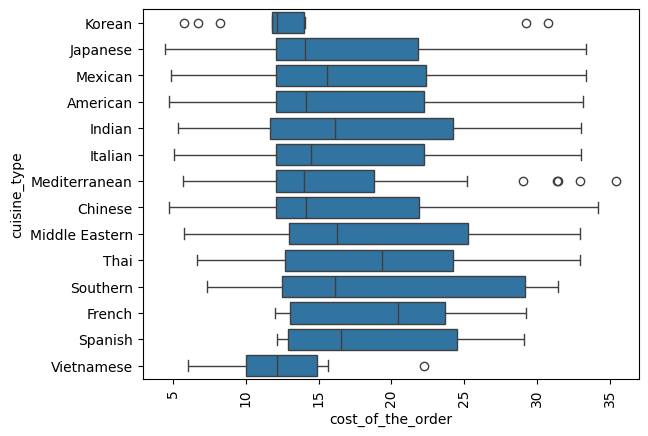

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

### Observations on Spread Cost of Order:
Most cuisines have varying degrees of skewed costs with afew having outliers such as Korean, Mediterranean and Vietnamese

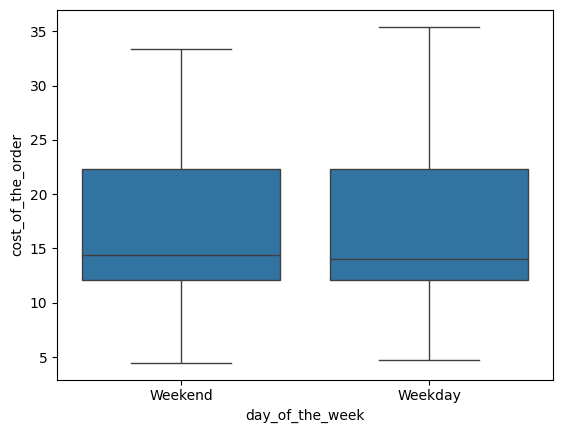

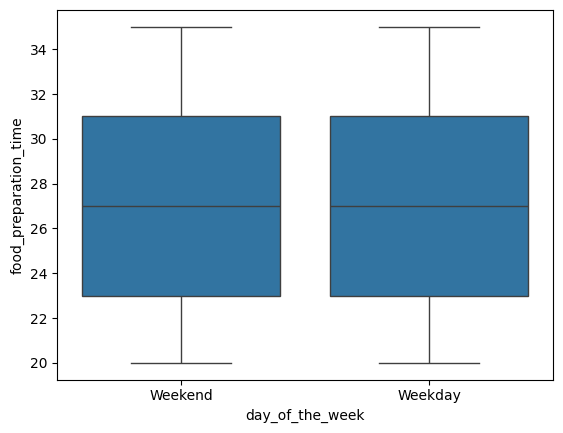

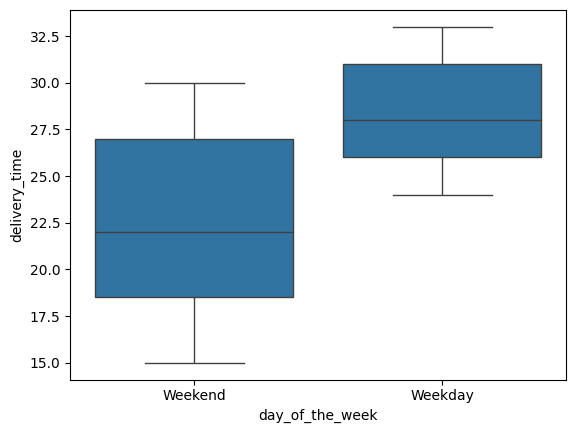

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

### Observations on Day of the week against the other variables:
We note a steady spread of observations irrespective of the day of the week, except for delivery time which generally takes longer during the weekdays than during the weekends. The median delivery time for weekends is around 22.5 minutes while that of the weekdays is about 28.5 minutes

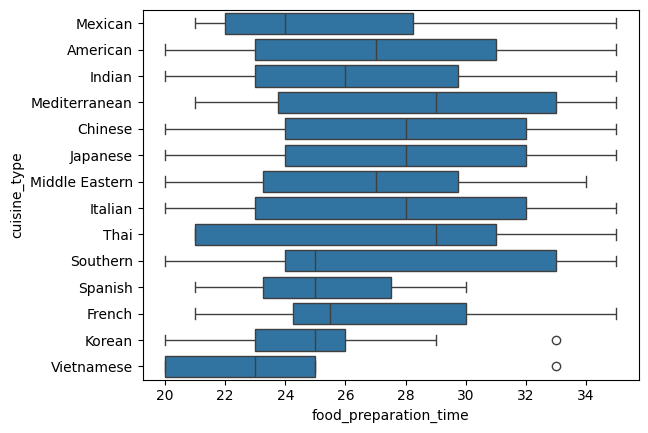

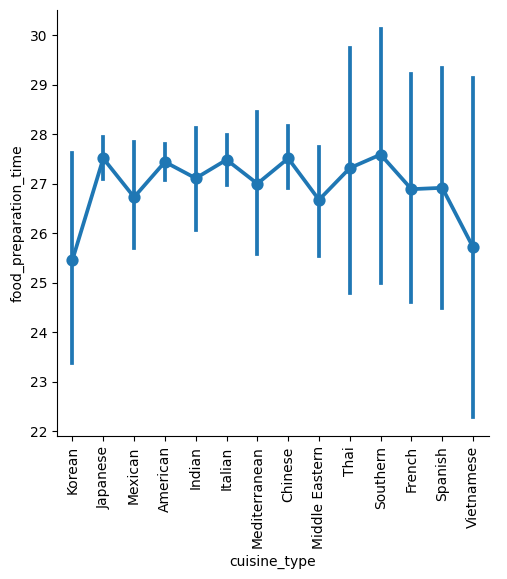

In [ ]:
sns.boxplot(data=df5,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

Most cuisine types have more or less the same average preparation time although some have a larger spread of the 95% confidence interval.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here
#Create a data set of Restaurants with a consideration of mean rating greater than 4. The rating eliminates all unrated rows in calculating the mean
df2 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4
#..and reset the index
df2.reset_index(inplace=True)
# Create a data set of Restaurants with a consideration of count of rating greate than 50.Equally in this case unrated orders are not considered.
df3 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50
#..and reset the index
df3.reset_index(inplace=True)
# Create a set of Restaurants that meet both conditions using merge
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
# Return the set of qualified restaurants only
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
Four Restaurants namely <b>Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop </b> qualify for the promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
# Create a variable to hold the revenues
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income


In [ ]:
print('Net revenue generated is: ',round(revenue,2),'assuming no commission charged for orders with cost below $5')


Net revenue generated is:  6166.3 assuming no commission charged for orders with cost below $5


#### Observations:
Given the market differentiation in price, FoodHub collected a total of $ 6163.39 for the orders given


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
# Create a new column to hold the computed value for total time required
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
# Review to confirm the new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [ ]:
#Compute the percentage of orders taking more than 60 minutes
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

10.54

#### Observations:
About <b>10.54% </b> of orders take more than 60 minutes to prepare and deliver.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
# The code computes the mean delivery time based on the day of the week, however it includes other statistics that maybe useful
# for review alongside the mean
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:
The mean delivery time during the weekend is 22.47 minutes against the weekday delivery time of 28.34. This is a curious observation especially reviewed against the count, which implies there are fewer orders over the weekdays compared to weekends. Probable explanation would be, there is higher traffic on weekdays than weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
Below is a summary of Key observations and conclusions
1. With <b>rating</b> concentrated around the high score of 5, its possible that mostly its the very satisfied customers that bother to rate the service. However alot of data about (38%) is lost in the unrated orders. A curious question that would arise is whether the unrated orders would skew the rating in a different direction
2. Whereas the cost of orders peak at around 13 dollars, there is a slight peak around 25 dollars as well making the observations bimodal
3. There is a consistent popularity structure of the cuisines irrespective of the day of the week although demand is significantly higher over the weekends.
4. Preparation time is relatively consistent as compared to delivery time, meaning delivery time is the significant variable in total preparation time (total time between order and delivery to customer).
5. There is a tie of 4 customers on the the 5th position given the reward criteria proposed. It requires further analysis or decision on how to handle such.
  

### Recommendations:
Based on the observations in this analysis below is recommended.
1. Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible entice them with a reward or follow up to know why they opt not to rate the service. This is so that better data can be available to determine customer satisfaction and enable service improvements
2.  The bimodal peak on the cost of orders processed may imply a differenciated market segment, possibly the  peak at 15 dollars has a higher concentration of students with the peak at 25 dollars having a higher concentration of the more affluent professionals. Further analysis of the customers' demographics may better reveal this.
3. Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales.
4. To improve on total order time (the total time taken between the customer placing the order and receiving their delivery) a review on how to bring down delivery time can be assessed to improve on overall service. A curious question also arises on whether the high delivery time is the cause of low orders during the weekdays.A review of whether customers shun ordering on weekdays because they anticipate a longer processing time for their order. Also could weekday traffic be the cause of the higher delivery time on weekdays?
5. On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them, considering the financial implication, or factor other aspects to distinguish the customers such as the amount spent by each one of the customers in a tie.

---